In [2]:
import os
# import drjit
gpu_num = 3 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 1.3026e-01 | 1.0000e+00 |    18245186 |   140070000 |        15000 |       15000 |       212.3 |reached max iter       
     -4.0 | 9.0853e-02 | 1.0000e+00 |    12725802 |   140070000 |        15000 |       15000 |       193.0 |reached max iter       
     -3.0 | 5.8654e-02 | 1.0000e+00 |     8215702 |   140070000 |        15000 |       15000 |       198.2 |reached max iter       
     -2.0 | 3.4318e-02 | 1.0000e+00 |     4806906 |   140070000 |        15000 |       15000 |       227.6 |reached max iter       
     -1.0 | 1.8491e-02 | 1.0000e+00 |     2589969 |   140070000 |        15000 |       15000 |       248.6 |reached max iter       
      0.0 | 8.9053e-03 | 1.0000e+00 |     1247360 |   140070000 |        15000 |     

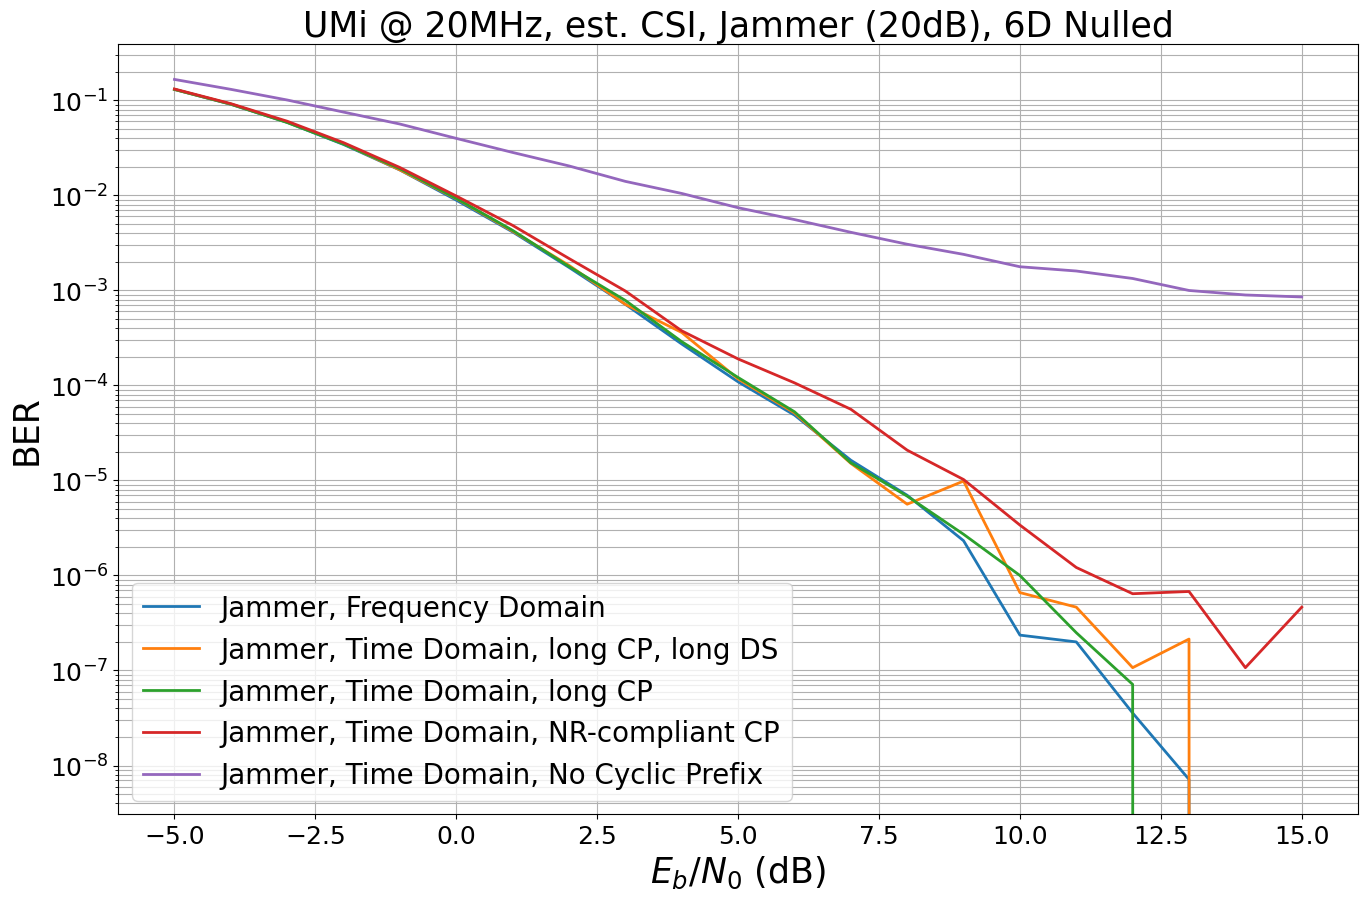

In [3]:
# here real est. CSI & NR compliant
ber_plots.reset()
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters
model_parameters["num_ut"] = 1
model_parameters["perfect_csi"] = False
model_parameters["perfect_jammer_csi"] = False
model_parameters["num_silent_pilot_symbols"] = 6
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(20.)
model_parameters["jammer_mitigation"] = "ian"
model_parameters["scenario"] = "umi"
#NR
model_parameters["fft_size"] = 667 # * 30kHz = 20MHz
# model_parameters["cyclic_prefix_length"] = 47 # 667 * 144 / 2048
model_parameters["cyclic_prefix_length"] = 210
sim.BATCH_SIZE = 30
# sim.MAX_MC_ITER = 100
sim.MAX_MC_ITER = 500
# sim.ebno_dbs = np.linspace(-5., 15., 11)
sim.ebno_dbs = np.linspace(-5., 15., 21)

model = Model(**model_parameters)
simulate_model(model, "Jammer, Frequency Domain")

sim.BATCH_SIZE = 1
sim.MAX_MC_ITER = 6000
model_parameters["domain"] = "time"
model_parameters["maximum_delay_spread"] = 1e-5
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, long CP, long DS")

model_parameters["domain"] = "time"
model_parameters["maximum_delay_spread"] = 3e-6
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, long CP")

model_parameters["domain"] = "time"
model_parameters["maximum_delay_spread"] = 3e-6
jammer_parameters["send_cyclic_prefix"] = True
model_parameters["cyclic_prefix_length"] = 47 # 667 * 144 / 2048
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, NR-compliant CP")

jammer_parameters["send_cyclic_prefix"] = False
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, No Cyclic Prefix")

ber_plots.title = "UMi @ 20MHz, est. CSI, Jammer (20dB), 6D Nulled"
ber_plots()
with open("bers/time_pos_umi_est_1ue_long_ds.pickle", 'wb') as f:
    bers = pickle.dump(ber_plots, f)

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 6.1174e-03 | 1.0000e+00 |      856870 |   140070000 |        15000 |       15000 |       209.8 |reached max iter       
     -3.0 | 1.4018e-03 | 9.8220e-01 |      196353 |   140070000 |        14733 |       15000 |       198.1 |reached max iter       
     -1.0 | 2.4869e-04 | 5.4280e-01 |       34834 |   140070000 |         8142 |       15000 |       202.3 |reached max iter       
      1.0 | 3.8174e-05 | 1.3853e-01 |        5347 |   140070000 |         2078 |       15000 |       206.8 |reached max iter       
      3.0 | 5.9899e-06 | 2.5133e-02 |         839 |   140070000 |          377 |       15000 |       207.7 |reached max iter       
      5.0 | 7.4249e-07 | 4.4000e-03 |         104 |   140070000 |           66 |     

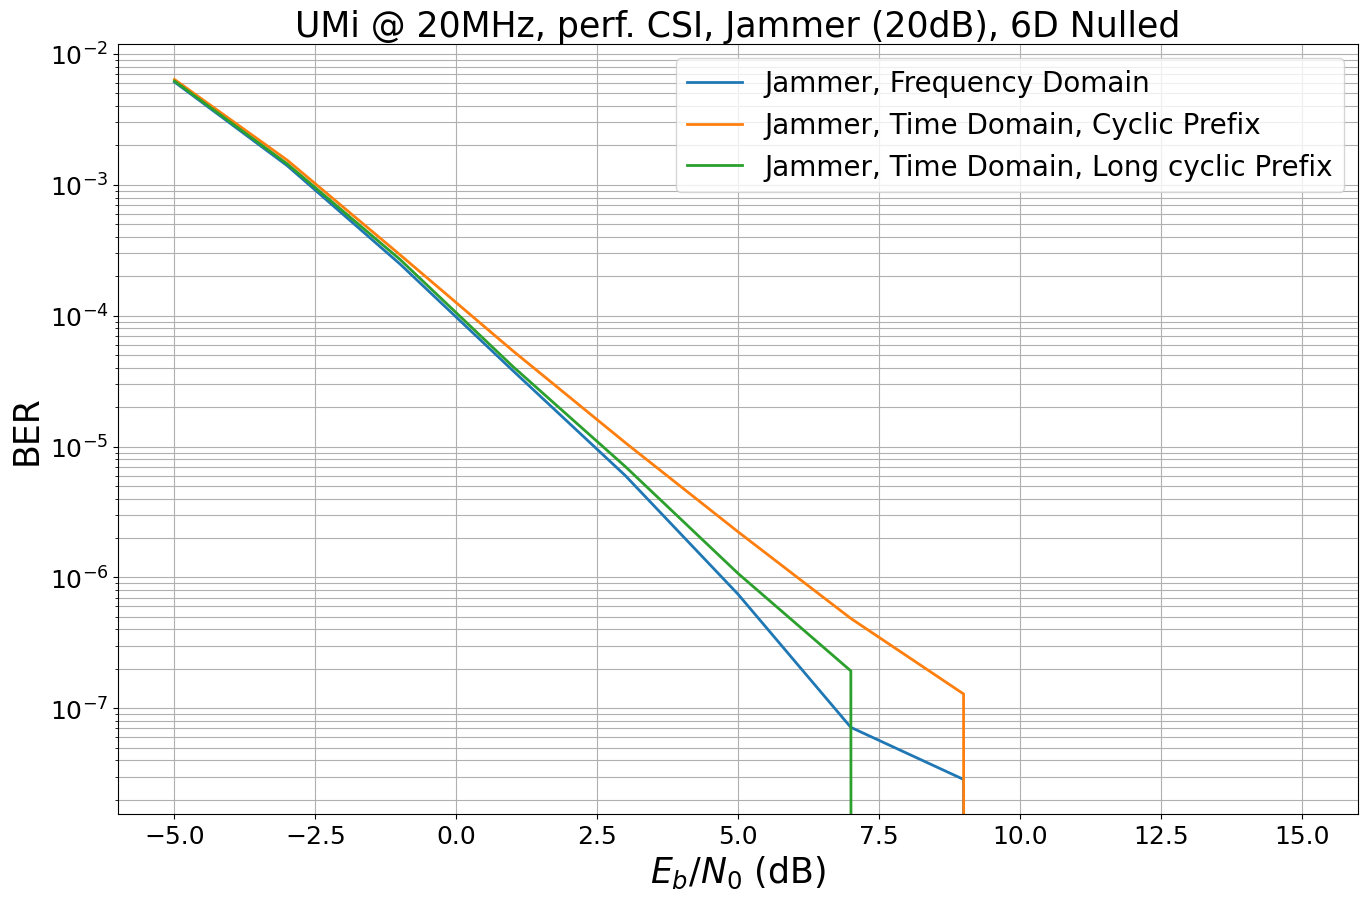

: 

In [4]:

# NR compliant (perf. CSI)
ber_plots.reset()
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters
model_parameters["num_ut"] = 1
model_parameters["perfect_csi"] = True
model_parameters["perfect_jammer_csi"] = False
model_parameters["num_silent_pilot_symbols"] = 6
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(20.)
model_parameters["jammer_mitigation"] = "ian"
model_parameters["scenario"] = "umi"
model_parameters["fft_size"] = 667 # * 30kHz = 20MHz
model_parameters["cyclic_prefix_length"] = 47 # 667 * 144 / 2048


sim.BATCH_SIZE = 30
sim.MAX_MC_ITER = 500
sim.ebno_dbs = np.linspace(-5., 15., 11)
model = Model(**model_parameters)
simulate_model(model, "Jammer, Frequency Domain")

sim.BATCH_SIZE = 5
sim.MAX_MC_ITER = 3000
sim.ebno_dbs = np.linspace(-5., 15., 11)

model_parameters["domain"] = "time"
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, Cyclic Prefix")

model_parameters["cyclic_prefix_length"] = 200
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, Long cyclic Prefix")

# jammer_parameters["send_cyclic_prefix"] = False
# model = Model(**model_parameters)
# simulate_model(model, "Jammer, Time Domain, No Cyclic Prefix")

ber_plots.title = "UMi @ 20MHz, perf. CSI, Jammer (20dB), 6D Nulled"
ber_plots()
with open("bers/time_pos_umi_nr_1ue_perf.pickle", 'wb') as f:
    bers = pickle.dump(ber_plots, f)